In [1]:
import yfinance as yf

In [2]:
tesla = yf.Ticker("TSLA")

In [3]:
tesla_data = tesla.history(period="max")

In [4]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [6]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
pip install requests
import requests


In [7]:

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {
    "User-Agent": "Mozilla/5.0"
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, "html.parser")

# Use CSS selector to target the revenue table rows
rows = soup.select("#style-1 div + div .historical_data_table tr")[1:]

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in rows:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

# Display the last five rows
print(tesla_revenue.tail())


Empty DataFrame
Columns: [Date, Revenue]
Index: []


In [8]:
import yfinance as yf

# Create a Ticker object for GameStop
gme = yf.Ticker("GME")

# Extract historical stock data
gme_data = gme.history(period="max")

# Reset the index
gme_data.reset_index(inplace=True)

# Display the first five rows
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [9]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Step 1: Set up the URL and headers
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {
    "User-Agent": "Mozilla/5.0"
}

# Step 2: Fetch and parse the HTML
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, "html.parser")

# Step 3: Locate the revenue table
tables = soup.find_all("table", class_="historical_data_table")
revenue_table = tables[1]  # Usually the second table contains quarterly revenue
rows = revenue_table.find_all("tr")[1:]  # Skip header row

# Step 4: Build the dataframe
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in rows:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        gme_revenue = gme_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

# Step 5: Display the last five rows
print(gme_revenue.tail())


IndexError: list index out of range

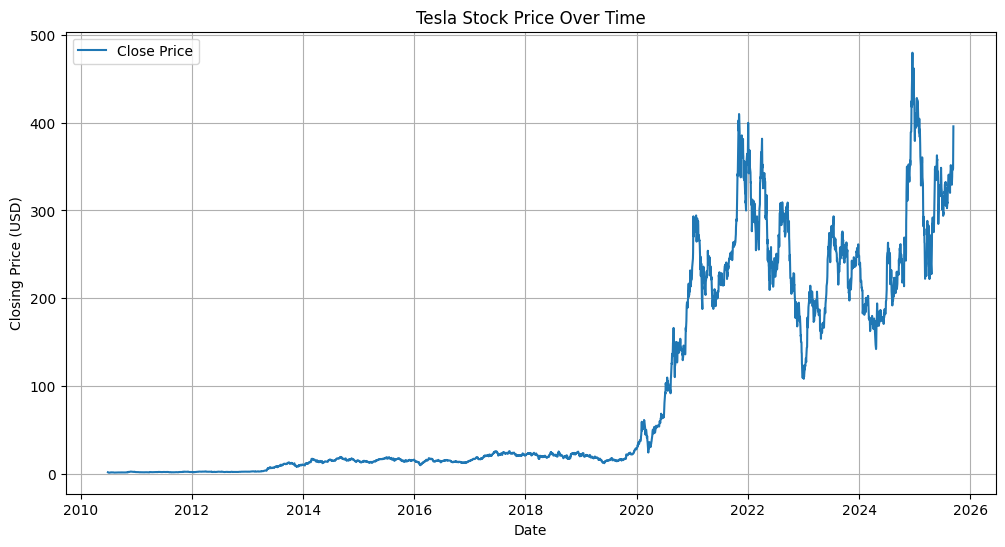

In [10]:
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

# Step 2: Define the make_graph function
def make_graph(stock_data, stock_name):
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
    plt.title(f"{stock_name} Stock Price Over Time")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (USD)")
    plt.grid(True)
    plt.legend()
    plt.show()

# Step 3: Call the function with Tesla data
make_graph(tesla_data, "Tesla")


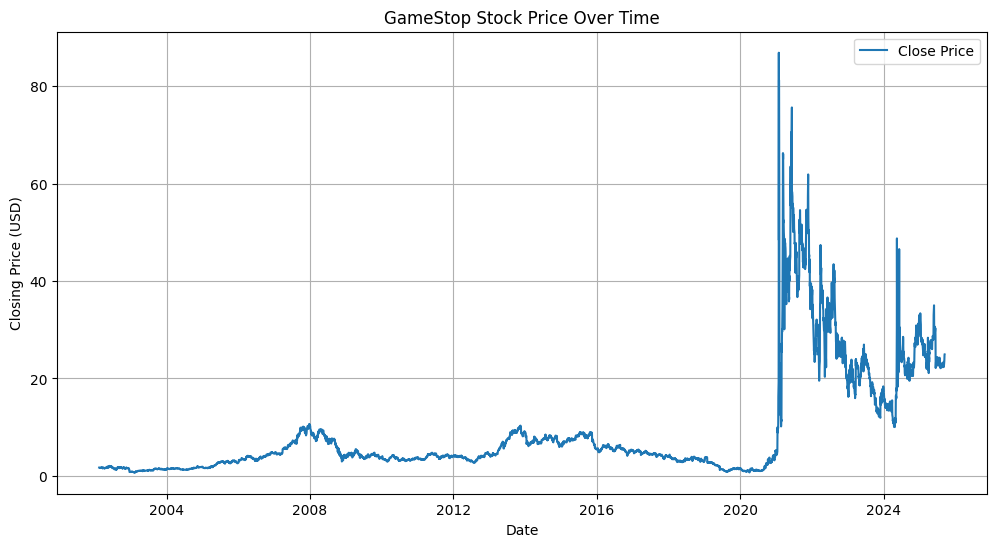

In [11]:
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Download GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)

# Step 2: Define the make_graph function
def make_graph(stock_data, stock_name):
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
    plt.title(f"{stock_name} Stock Price Over Time")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (USD)")
    plt.grid(True)
    plt.legend()
    plt.show()

# Step 3: Call the function with GameStop data
make_graph(gme_data, "GameStop")
